# DB
deals with storage of objects

In [14]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, DateTime, PickleType
from db import ModelTracker, DBClient

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# I. Clear DB

In [16]:
dbclient = DBClient()
dbclient.clear()
assert len(dbclient.get_model_names()) == 0

# II. Make/Fill a Model

In [17]:
mt = ModelTracker('my_first_model', comment='this is test #1')
for i in range(100):
    mt.add_record(10 - 0.1*i, 'loss')
    mt.add_record(0.09*i, 'accuracy')

# III. Retrieve Models/Plot Records

In [20]:
model_names = dbclient.get_model_names()
assert model_names == {'my_first_model'}

In [22]:
mt = dbclient.get_model_tracker('my_first_model')
loss_records = mt.get_records('loss')
acc_records = mt.get_records('accuracy')

Populating the interactive namespace from numpy and matplotlib


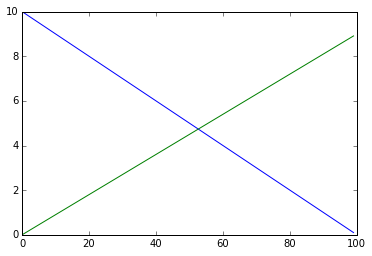

In [24]:
import matplotlib.pyplot as plt
%pylab inline
plt.plot(loss_records['data'])
plt.plot(acc_records['data'])